### Import Libraries

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [48]:
# d stands for daily
d_activity = pd.read_csv('Fitbit Data/dailyActivity_merged.csv')
d_calories = pd.read_csv('Fitbit Data/dailyCalories_merged.csv')
d_steps = pd.read_csv('Fitbit Data/dailySteps_merged.csv')
# h stands for hourly 
h_calories = pd.read_csv('Fitbit Data/hourlyCalories_merged.csv')
h_steps = pd.read_csv('Fitbit Data/hourlySteps_merged.csv')

# m stands for Minutes
m_mets = pd.read_csv('Fitbit Data/minuteMETsNarrow_merged.csv')
m_steps = pd.read_csv('Fitbit Data/minuteStepsNarrow_merged.csv')
m_calories = pd.read_csv('Fitbit Data/minuteCaloriesNarrow_merged.csv')

In [20]:
d_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [35]:
d_calories.describe()

,Id,Calories
count,9.400000e+02,940.000000
mean,4.855407e+09,2303.609574
std,2.424805e+09,718.166862
min,1.503960e+09,0.000000
25%,2.320127e+09,1828.500000
50%,4.445115e+09,2134.000000
75%,6.962181e+09,2793.250000
max,8.877689e+09,4900.000000


In [36]:
steps_distance_corr = np.corrcoef(d_activity['TotalSteps'], d_activity['TotalDistance'])
print(steps_distance_correlation)

[[1.         0.98536884]
 [0.98536884 1.        ]]


<function matplotlib.pyplot.show(close=None, block=None)>

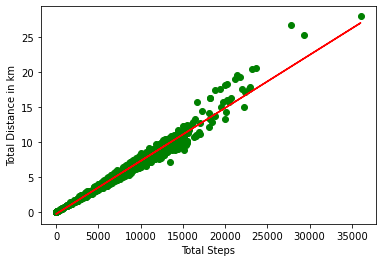

In [33]:
x = d_activity['TotalSteps']
y = d_activity['TotalDistance']
plt.plot(x, y, 'o', color='green')
plt.xlabel('Total Steps')
plt.ylabel('Total Distance in km')

# obtain slope (m) and intercept (b) of linera regression line 
m, b = np.polyfit(x, y, 1)

# plot the linear regression line
plt.plot(x, m*x+b, color='red')
plt.show

In [28]:
# correlation of daily activity column steps and calories
steps_calories_corr = np.corrcoef(d_activity['TotalSteps'], d_activity['Calories'])
print(steps_calories_correlation)

# correlation of hourly steps and calories
hourly_steps_calories_corr = np.corrcoef(h_steps['StepTotal'], h_calories['Calories'])
print(hourly_steps_calories_correlation)


[[1.         0.59156809]
 [0.59156809 1.        ]]
[[1.         0.81496797]
 [0.81496797 1.        ]]


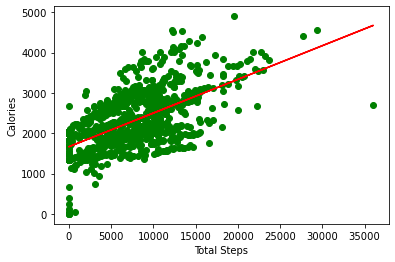

In [39]:
x = d_activity['TotalSteps']
y = d_activity['Calories']
plt.plot(x, y, 'o', color='green')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')

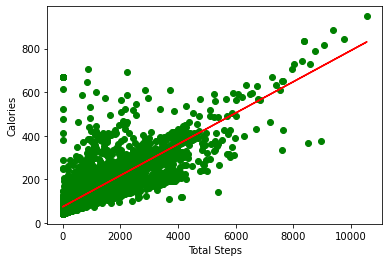

In [40]:
x = h_steps['StepTotal']
y = h_calories['Calories']
plt.plot(x, y, 'o', color='green')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='red')

In [43]:
m_mets

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10
2,1503960366,4/12/2016 12:02:00 AM,10
3,1503960366,4/12/2016 12:03:00 AM,10
4,1503960366,4/12/2016 12:04:00 AM,10
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,11
1325576,8877689391,5/12/2016 1:56:00 PM,11
1325577,8877689391,5/12/2016 1:57:00 PM,11
1325578,8877689391,5/12/2016 1:58:00 PM,11


In [44]:
m_calories

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.78650
1,1503960366,4/12/2016 12:01:00 AM,0.78650
2,1503960366,4/12/2016 12:02:00 AM,0.78650
3,1503960366,4/12/2016 12:03:00 AM,0.78650
4,1503960366,4/12/2016 12:04:00 AM,0.78650
...,...,...,...
1325575,8877689391,5/12/2016 1:55:00 PM,1.33353
1325576,8877689391,5/12/2016 1:56:00 PM,1.33353
1325577,8877689391,5/12/2016 1:57:00 PM,1.33353
1325578,8877689391,5/12/2016 1:58:00 PM,1.33353


In [47]:
minute_mets_calories_corr = np.corrcoef(m_mets['METs'], m_calories['Calories'])
print(minute_mets_calories_corr)

[[1.         0.95596063]
 [0.95596063 1.        ]]


In [56]:
minute_steps_calorreis_corr = np.corrcoef(m_steps['Steps'], m_calories['Calories'])
print(minute_steps_calorreis_corr)

[[1.         0.83106106]
 [0.83106106 1.        ]]
